# THIS IS AN EXAMPLE IS TO HELP MUNG DATA WHEN YOU ARE DEALING WITH ABSOLUTE FILTH

In [22]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
# Making data frame from the csv file
df = pd.read_csv('C:/Users/jalmo1/Documents/Marketing/Performance mrktg/dregs.csv')
df.head()

,Retail Week,Harmonized Marketing Channel,Harmonized Brand,Month,Week of Year,Spend,Impressions,Engagements,Clicks,Video Completions 25%,Demand Sales,Orders,Total Traffic,CPM,CPC,CTR
0,20-Jun-22,Push Notification,Not Valid,1-Nov-21,46,NaN,NaN,NaN,NaN,NaN,"26,234.11",165.00,0.00,NaN,NaN,NaN
1,20-Jun-22,Paid Social,Not Valid,1-Nov-21,46,NaN,NaN,NaN,NaN,NaN,483.66,6.00,"6,618.00",NaN,NaN,NaN
2,20-Jun-22,Paid Social,Comp,1-Nov-21,46,NaN,NaN,NaN,NaN,NaN,"19,816.13",253.00,"56,596.00",NaN,NaN,NaN
3,20-Jun-22,Paid Search,Not Valid,1-Nov-21,46,"$48,701.45","16,272,790","264,621","264,621",NaN,"130,982.21","1,455.00","215,201.00",$2.99,$0.18,1.63 %
4,20-Jun-22,Paid Search,Performance,1-Nov-21,46,"$20,399.47","7,607,786","188,915","188,915",NaN,NaN,NaN,NaN,$2.68,$0.11,2.48 %


In [4]:
#get the info 
#only one of the fields is an integer
#we got our work cut out in prepping for modeling
#target variable: demand sales
#id want to do var name ie harmonized marketing channel to just channel, total traffic to just traffic 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 16 columns):
Retail Week                     496 non-null object
Harmonized Marketing Channel    496 non-null object
Harmonized Brand                496 non-null object
Month                           496 non-null object
Week of Year                    496 non-null int64
Spend                           119 non-null object
Impressions                     119 non-null object
Engagements                     90 non-null object
Clicks                          119 non-null object
Video Completions 25%           30 non-null float64
Demand Sales                    437 non-null object
Orders                          437 non-null object
Total Traffic                   437 non-null object
CPM                             119 non-null object
CPC                             117 non-null object
CTR                             119 non-null object
dtypes: float64(1), int64(1), object(14)
memory usage: 62.1+ KB


In [24]:
df.describe()

,RW_num,VC_25
count,496.000000,30.000000
mean,27.947581,3.166667
std,22.713349,8.998403
min,1.000000,0.000000
25%,4.000000,0.000000
50%,46.000000,0.000000
75%,49.000000,1.000000
max,52.000000,45.000000


In [25]:
#if any string columns in data set 
df.describe(include=[np.object])

,RW,Channel,Brand,Month,Spend,Impressions,Engagements,Clicks,Sales,Orders,Traffic,CPM,CPC,CTR
count,496,496,496,496,119,119,90,119,437,437,437,119,117,119
unique,14,13,3,4,116,116,90,118,369,276,328,93,25,99
top,4-Jul-22,Paid Search,Not Valid,1-Jan-22,$0.00,2,"117,539",0,0.00,0.00,0.00,$0.16,$0.16,1.63 %
freq,50,88,349,181,4,2,1,2,69,69,58,5,13,3


In [5]:
#check how many nulls you got
df.isna().sum()

Retail Week                       0
Harmonized Marketing Channel      0
Harmonized Brand                  0
Month                             0
Week of Year                      0
Spend                           377
Impressions                     377
Engagements                     406
Clicks                          377
Video Completions 25%           466
Demand Sales                     59
Orders                           59
Total Traffic                    59
CPM                             377
CPC                             379
CTR                             377
dtype: int64

In [9]:
#is there an easier way to read the % of nulls for each column?  instead of value, can i get the proportion instead?
#either of these work below
#df.isnull().sum() * 100 / len(df)
#df.isnull().mean() * 100
#df.isnull().sum() / df.shape[0] * 100.00

Retail Week                      0.000000
Harmonized Marketing Channel     0.000000
Harmonized Brand                 0.000000
Month                            0.000000
Week of Year                     0.000000
Spend                           76.008065
Impressions                     76.008065
Engagements                     81.854839
Clicks                          76.008065
Video Completions 25%           93.951613
Demand Sales                    11.895161
Orders                          11.895161
Total Traffic                   11.895161
CPM                             76.008065
CPC                             76.411290
CTR                             76.008065
dtype: float64

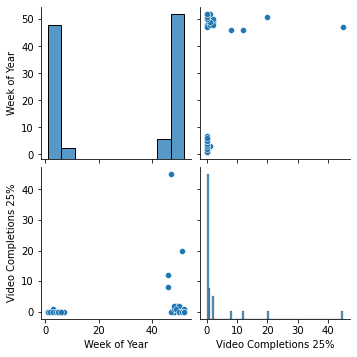

In [20]:
#get the visualization first to set your bearings
import seaborn as sns
import matplotlib.pyplot as plt

(
    df
    .pipe(sns.pairplot)
    
)
#only 2 columns are numbers so below is all im gonna get, i need to change datatypes

In [23]:
#i found this online where you can use a dictionary when you have multiple columns that need different datatypes
#should I rename first then  convert the data types? lets rename them first

# create a dictionary
# key = old name
# value = new name
dict = {'Retail Week': 'RW',
        'Harmonized Marketing Channel': 'Channel',
        'Harmonized Brand': 'Brand',
        'Week of Year':'RW_num',
        'Video Completions 25%':'VC_25',
        'Demand Sales': 'Sales',
       'Total Traffic':'Traffic'}
 
# call rename () method
df.rename(columns=dict,
          inplace=True)
 
# print Data frame after rename columns
display(df)






,RW,Channel,Brand,Month,RW_num,Spend,Impressions,Engagements,Clicks,VC_25,Sales,Orders,Traffic,CPM,CPC,CTR
0,20-Jun-22,Push Notification,Not Valid,1-Nov-21,46,NaN,NaN,NaN,NaN,NaN,"26,234.11",165.00,0.00,NaN,NaN,NaN
1,20-Jun-22,Paid Social,Not Valid,1-Nov-21,46,NaN,NaN,NaN,NaN,NaN,483.66,6.00,"6,618.00",NaN,NaN,NaN
2,20-Jun-22,Paid Social,Comp,1-Nov-21,46,NaN,NaN,NaN,NaN,NaN,"19,816.13",253.00,"56,596.00",NaN,NaN,NaN
3,20-Jun-22,Paid Search,Not Valid,1-Nov-21,46,"$48,701.45","16,272,790","264,621","264,621",NaN,"130,982.21","1,455.00","215,201.00",$2.99,$0.18,1.63 %
4,20-Jun-22,Paid Search,Performance,1-Nov-21,46,"$20,399.47","7,607,786","188,915","188,915",NaN,NaN,NaN,NaN,$2.68,$0.11,2.48 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,19-Sep-22,Email,Not Valid,1-Feb-22,6,NaN,NaN,NaN,NaN,NaN,"8,042.83",65.00,"7,819.00",NaN,NaN,NaN
492,19-Sep-22,Affiliate,Performance,1-Feb-22,7,"$4,216.24",53,NaN,"22,881",NaN,NaN,NaN,NaN,"$79,551.70",$0.18,"43,171.70 %"
493,19-Sep-22,Affiliate,Performance,1-Feb-22,6,"$1,890.46",13,NaN,"12,949",NaN,NaN,NaN,NaN,"$145,420.00",$0.15,"99,607.69 %"
494,19-Sep-22,Affiliate,Not Valid,1-Feb-22,7,NaN,NaN,NaN,NaN,NaN,"11,561.67",125.00,"9,614.00",NaN,NaN,NaN


In [29]:
#i was not able to use the conversion below because spend has floats and strings in the column

df['Spend'].apply(type).value_counts()

<class 'float'>    377
<class 'str'>      119
Name: Spend, dtype: int64

In [28]:
#now convert the datatypes 
# this would would if all the columns were one type and u are converting to different type but as seen above, ive got columns
#with different datatypes, feels bad man
  
# using dictionary to convert specific columns
convert_dict = {#'RW': datetime,
                #'Month': datetime,
                'RW_num': int,
                'Spend': float,
                'Impressions': int,
                'Engagements': int,
                'Clicks': int,
                'VC_25':int,
                'Sales': float,
                'Orders':int,
                'Traffic': int,
                'CPM': float,
                'CPC':float,
                'CPM':float
                
               }
  
df = df.astype(convert_dict)
print(df.dtypes)

ValueError: could not convert string to float: '$48,701.45'

In [30]:
#you need to look for strings first and remove $ and , then convert to float otherwise you will get nan
#if you try to convert a nonstring to float
df1 = df.copy()
df1['Spend'] = df['Spend'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

In [31]:
#data type is now float 
df1['Spend'].apply(type).value_counts()


<class 'float'>    496
Name: Spend, dtype: int64

In [33]:
df1.head()

,RW,Channel,Brand,Month,RW_num,Spend,Impressions,Engagements,Clicks,VC_25,Sales,Orders,Traffic,CPM,CPC,CTR
0,20-Jun-22,Push Notification,Not Valid,1-Nov-21,46,NaN,NaN,NaN,NaN,NaN,"26,234.11",165.00,0.00,NaN,NaN,NaN
1,20-Jun-22,Paid Social,Not Valid,1-Nov-21,46,NaN,NaN,NaN,NaN,NaN,483.66,6.00,"6,618.00",NaN,NaN,NaN
2,20-Jun-22,Paid Social,Comp,1-Nov-21,46,NaN,NaN,NaN,NaN,NaN,"19,816.13",253.00,"56,596.00",NaN,NaN,NaN
3,20-Jun-22,Paid Search,Not Valid,1-Nov-21,46,48701.45,"16,272,790","264,621","264,621",NaN,"130,982.21","1,455.00","215,201.00",$2.99,$0.18,1.63 %
4,20-Jun-22,Paid Search,Performance,1-Nov-21,46,20399.47,"7,607,786","188,915","188,915",NaN,NaN,NaN,NaN,$2.68,$0.11,2.48 %


In [48]:
# i checked the rest of the numerical values and they are a mix of string and floats so i need to apply the same
# for each one
df['Clicks'].apply(type).value_counts()

<class 'float'>    496
Name: Clicks, dtype: int64

In [53]:
df['Spend'] = df['Spend'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
#df['Impressions'] = df['Impressions'].apply(lambda x: x.replace('$', '').replace(',', '').replace(np.nan, 0)
 #                               if isinstance(x, str) else x).astype(int)
#df['Engagements'] = df['Engagements'].apply(lambda x: x.replace('$', '').replace(',', '').replace(np.nan, 0)
 #                               if isinstance(x, str) else x).astype(int)
#df['Clicks'] = df['Clicks'].apply(lambda x: x.replace('$', '').replace(',', '').replace(np.nan, 0)
 #                               if isinstance(x, str) else x).astype(int)
df['Sales'] = df['Sales'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
#df['Orders'] = df['Orders'].apply(lambda x: x.replace('$', '').replace(',', '').replace(np.nan, 0)
 #                               if isinstance(x, str) else x).astype(int)
#df['Traffic'] = df['Traffic'].apply(lambda x: x.replace('$', '').replace(',', '').replace(np.nan, 0)
 #                               if isinstance(x, str) else x).astype(int)
df['CPM'] = df['CPM'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
df['CPC'] = df['CPC'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
df['CTR'] = df['CTR'].apply(lambda x: x.replace('%', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

In [54]:
# i had to comment out the columns that were getting replaced with ints because it couldnt convert nans
#but i thought the replace np.nan would take care of it but was getting errors 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 16 columns):
RW             496 non-null object
Channel        496 non-null object
Brand          496 non-null object
Month          496 non-null object
RW_num         496 non-null int64
Spend          119 non-null float64
Impressions    119 non-null float64
Engagements    90 non-null object
Clicks         119 non-null float64
VC_25          30 non-null float64
Sales          437 non-null float64
Orders         437 non-null float64
Traffic        437 non-null float64
CPM            119 non-null float64
CPC            117 non-null object
CTR            119 non-null float64
dtypes: float64(9), int64(1), object(6)
memory usage: 62.1+ KB


In [57]:
#next option is to convert all nulls as zero first 
df=df.fillna(0)

In [58]:
df

,RW,Channel,Brand,Month,RW_num,Spend,Impressions,Engagements,Clicks,VC_25,Sales,Orders,Traffic,CPM,CPC,CTR
0,20-Jun-22,Push Notification,Not Valid,1-Nov-21,46,0.00,0.0,0,0.0,0.0,26234.11,165.0,0.0,0.00,0,0.00
1,20-Jun-22,Paid Social,Not Valid,1-Nov-21,46,0.00,0.0,0,0.0,0.0,483.66,6.0,6618.0,0.00,0,0.00
2,20-Jun-22,Paid Social,Comp,1-Nov-21,46,0.00,0.0,0,0.0,0.0,19816.13,253.0,56596.0,0.00,0,0.00
3,20-Jun-22,Paid Search,Not Valid,1-Nov-21,46,48701.45,16272790.0,"264,621",264621.0,0.0,130982.21,1455.0,215201.0,2.99,$0.18,1.63
4,20-Jun-22,Paid Search,Performance,1-Nov-21,46,20399.47,7607786.0,"188,915",188915.0,0.0,0.00,0.0,0.0,2.68,$0.11,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,19-Sep-22,Email,Not Valid,1-Feb-22,6,0.00,0.0,0,0.0,0.0,8042.83,65.0,7819.0,0.00,0,0.00
492,19-Sep-22,Affiliate,Performance,1-Feb-22,7,4216.24,53.0,0,22881.0,0.0,0.00,0.0,0.0,79551.70,$0.18,43171.70
493,19-Sep-22,Affiliate,Performance,1-Feb-22,6,1890.46,13.0,0,12949.0,0.0,0.00,0.0,0.0,145420.00,$0.15,99607.69
494,19-Sep-22,Affiliate,Not Valid,1-Feb-22,7,0.00,0.0,0,0.0,0.0,11561.67,125.0,9614.0,0.00,0,0.00


In [60]:
#the nulls were likely counting floats and strings in the type counts earlier since it was treating nulls as strings
#after replacing nulls with 0s , now only floats appear
df1['Impressions'].apply(type).value_counts()


<class 'float'>    496
Name: Impressions, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 16 columns):
RW             496 non-null object
Channel        496 non-null object
Brand          496 non-null object
Month          496 non-null object
RW_num         496 non-null int64
Spend          496 non-null float64
Impressions    496 non-null float64
Engagements    496 non-null object
Clicks         496 non-null float64
VC_25          496 non-null float64
Sales          496 non-null float64
Orders         496 non-null float64
Traffic        496 non-null float64
CPM            496 non-null float64
CPC            496 non-null object
CTR            496 non-null float64
dtypes: float64(9), int64(1), object(6)
memory usage: 62.1+ KB


In [65]:
# run this conversion again and you should not see this error anymore 

df['Spend'] = df['Spend'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
df['Impressions'] = df['Impressions'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(int)
df['Engagements'] = df['Engagements'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(int)
df['Clicks'] = df['Clicks'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(int)
df['Sales'] = df['Sales'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
df['Orders'] = df['Orders'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(int)
df['Traffic'] = df['Traffic'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(int)
df['CPM'] = df['CPM'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
df['CPC'] = df['CPC'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
df['CTR'] = df['CTR'].apply(lambda x: x.replace('%', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

In [67]:
# now you got all the values you want in proper form with updated labels minus the date fields. gotta ask
#prof pelc about that , why the date conversions are being dumb
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 16 columns):
RW             496 non-null object
Channel        496 non-null object
Brand          496 non-null object
Month          496 non-null object
RW_num         496 non-null int64
Spend          496 non-null float64
Impressions    496 non-null int32
Engagements    496 non-null int32
Clicks         496 non-null int32
VC_25          496 non-null float64
Sales          496 non-null float64
Orders         496 non-null int32
Traffic        496 non-null int32
CPM            496 non-null float64
CPC            496 non-null float64
CTR            496 non-null float64
dtypes: float64(6), int32(5), int64(1), object(4)
memory usage: 52.4+ KB


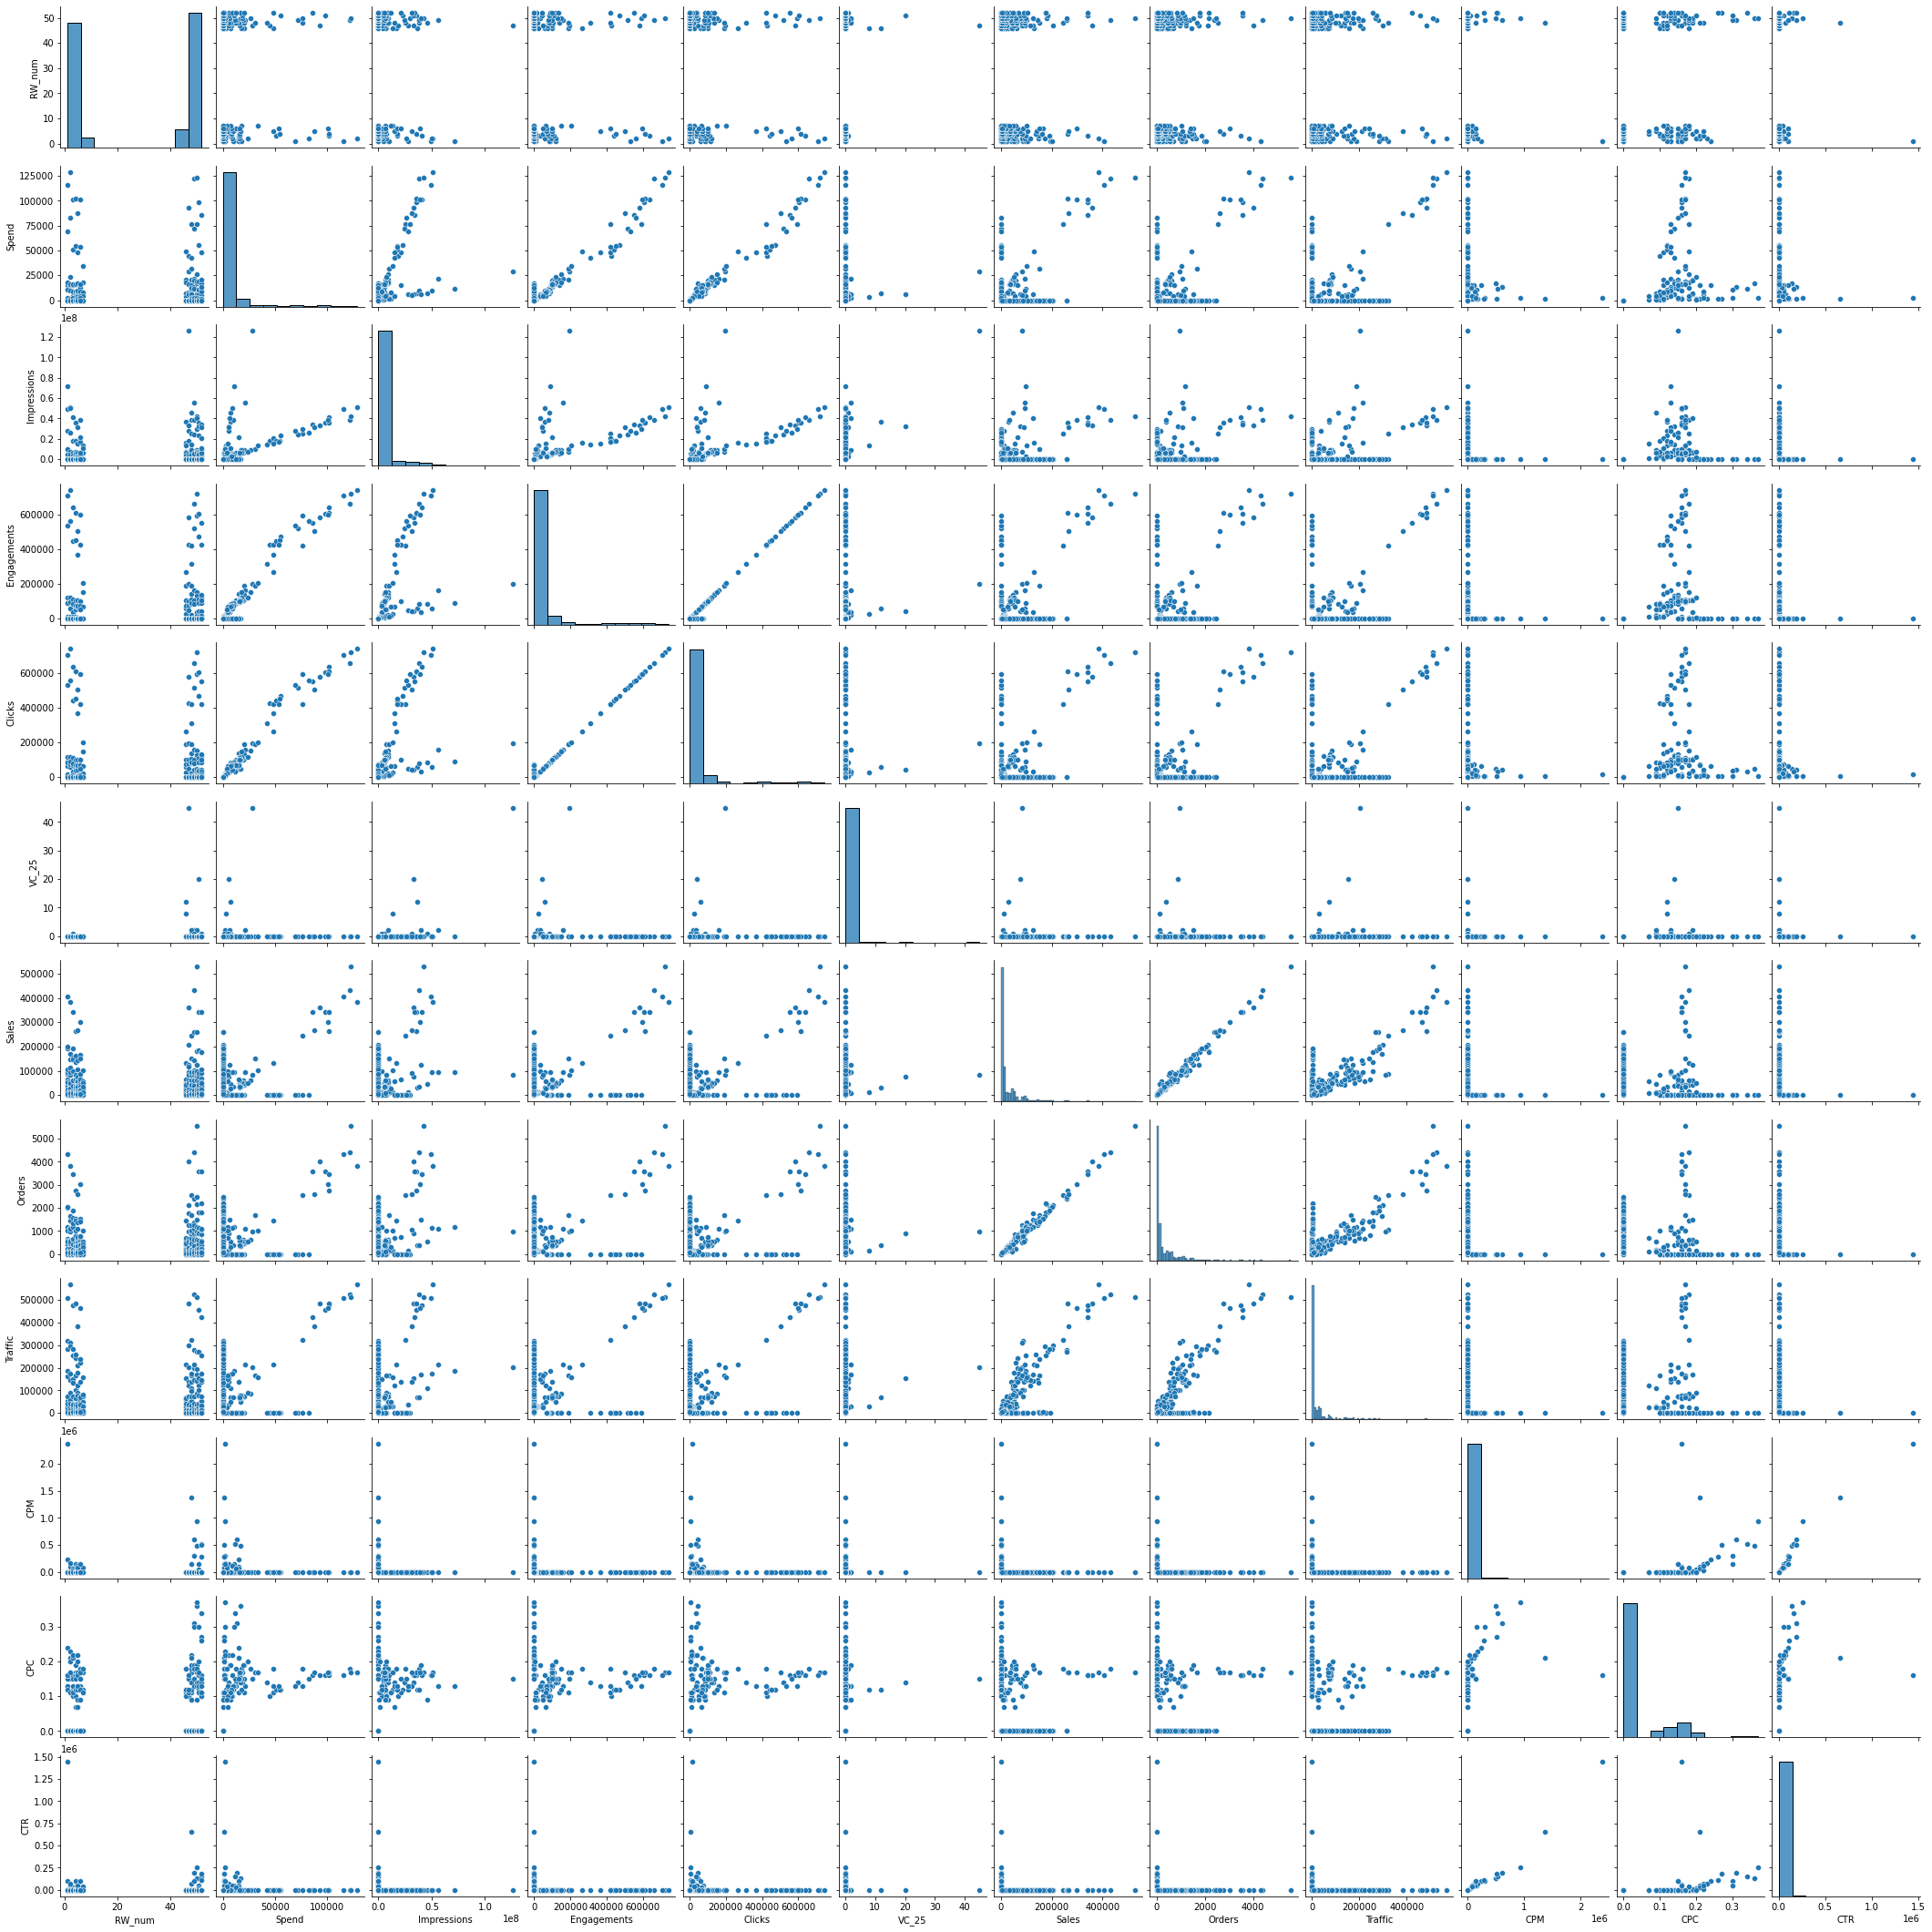

In [68]:
# now i am getting more charts in the viz and it looks like complete shit since these are reald world numbers

(
    df
    .pipe(sns.pairplot)
    
)